### Introduction 

In this notebook, I identify go over the collected lyrics and clean these texts from non-lyric related phrases. I also identify non-lyric text that is fetched by mistake and clean them from the data.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv ('../datasets/all_songs_with_more_genius_lyrics.csv', index_col=False)
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... mode  speechiness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...    1       0.0583   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...    1       0.0373   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...    0       0.0742   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...    1       0.1020   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...    1       0.0359   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.1020          0.000000    0.0653    0.518  122.036       194754   
1        0.0724          0.004210    0.3570    0.693   99.972       162600   
2        0.0794          0.000023    0.1100    0.613  124.008       176616   
3        0.0287          0.000009    0.2040    0.277  121.956       169093   
4        0.0803          0.000000    0.0833    0.725  123.976       189052   

                                        track_lyrics  artist_gender  
0                                          no result           Male  
1  3 ContributorsMemories (Dillon Francis Remix) ...           Male  
2  8 ContributorsAll the Time (Don Diablo Remix) ...         Female  
3  5 ContributorsCall You Mine (Keanu Silva Remix...         Female  
4  1 ContributorSomeone You Loved (Future Humans ...           Male  

[5 rows x 25 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28347 entries, 0 to 28346
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  28347 non-null  object 
 1   track_name                28347 non-null  object 
 2   track_artist              28347 non-null  object 
 3   track_popularity          28347 non-null  int64  
 4   track_album_id            28347 non-null  object 
 5   track_album_name          28347 non-null  object 
 6   track_album_release_date  28347 non-null  object 
 7   playlist_name             28347 non-null  object 
 8   playlist_id               28347 non-null  object 
 9   playlist_genre            28347 non-null  object 
 10  playlist_subgenre         28347 non-null  object 
 11  danceability              28347 non-null  float64
 12  energy                    28347 non-null  float64
 13  key                       28347 non-null  int64  
 14  loudne

When I fetched lyrics in the previous notebook, the code filled the `track_lyrics` column with 'error' if there was an error, and 'no result' if there was no lyrics found for that song. I check them next.

In [10]:
# count of songs with no result in lyric search
no_result = sum(df['track_lyrics']=='no result')

# count songs with an error in lyric search that was not resolved
error = sum(df['track_lyrics']=='error')

# count of song lyrics that are not null
non_null = df['track_lyrics'].count()

print(f'Out of {non_null} non-null values in the track lyrics column, {error} of them are "error" and {no_result} are "no result".')

Out of 28347 non-null values in the track lyrics column, 2 of them are "error" and 2499 are "no result".


Let's exclude these errors and no results.

In [11]:
# filter out rows with 'no result' and 'error' in track_lyrics column
df1 = df[(df['track_lyrics']!='no result') & (df['track_lyrics']!='error')]
df1.shape

(25846, 25)

df1 is the dataframe for the subset of lyrics I work with for now. There are 25846 songs. Let's drop the columns we would not need.

In [12]:
df1 = df1[['track_id', 'track_name', 'track_artist', 'track_lyrics']]
df1.shape

(25846, 4)

Now, there are 25846 songs. I know some are not in English. Let's create a column that encodes the language of a song.

In [13]:
%pip install langid

Note: you may need to restart the kernel to use updated packages.


In [14]:
import langid

def detect_language(text):
    lang, _ = langid.classify(text)
    return lang

# store the detected language
df1['language'] = df1['track_lyrics'].apply(detect_language)

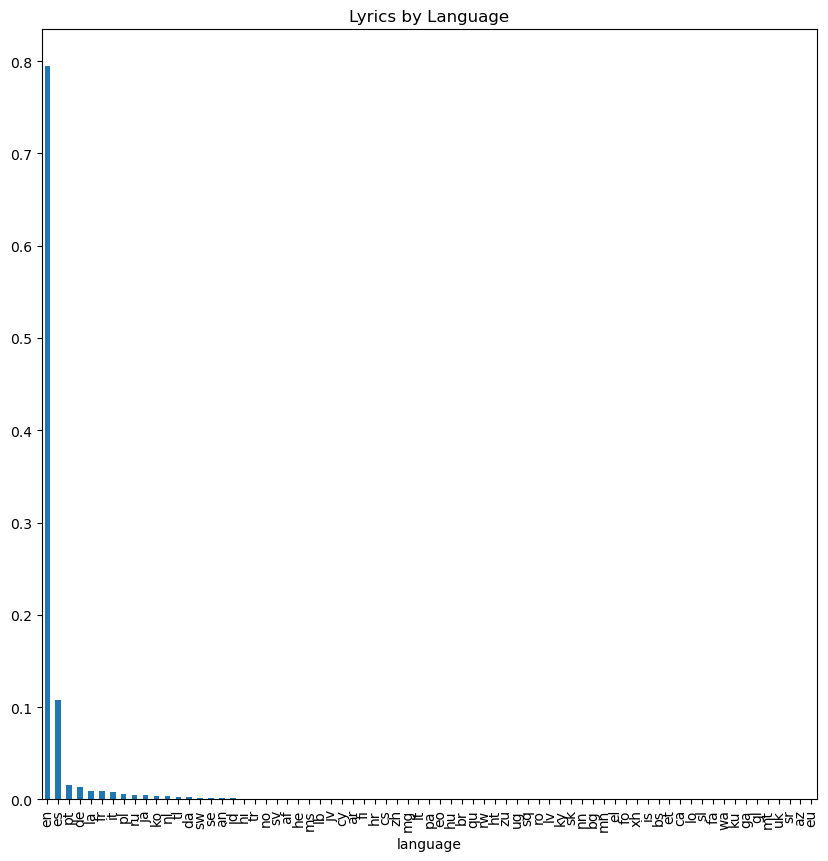

In [15]:
plt.figure(figsize=(10,10))
df1['language'].value_counts(normalize=True).plot(kind='bar')
plt.title('Lyrics by Language')
plt.show()

In [16]:
df1['language'].value_counts().sort_values(ascending=True)

language
eu        1
xh        1
is        1
bs        1
et        1
      ...  
la      226
de      353
pt      391
es     2793
en    20540
Name: count, Length: 71, dtype: int64

Some of them appear only once. 20540 songs are in English and 2793 are in Spanish.

While using the Genius API, I checked for token count (simply split by space) and some lyrics are too long. They might be something else that is retrieved by mistake. Let's check them out next.

In [17]:
df1['token_count'] = df1['track_lyrics'].apply(lambda x: len(x.split()))
df1.head()

track_id                                         track_name  \
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   
5  7fvUMiyapMsRRxr07cU8Ef  Beautiful People (feat. Khalid) - Jack Wins Remix   

       track_artist                                       track_lyrics  \
1          Maroon 5  3 ContributorsMemories (Dillon Francis Remix) ...   
2      Zara Larsson  8 ContributorsAll the Time (Don Diablo Remix) ...   
3  The Chainsmokers  5 ContributorsCall You Mine (Keanu Silva Remix...   
4     Lewis Capaldi  1 ContributorSomeone You Loved (Future Humans ...   
5        Ed Sheeran  3 ContributorsBeautiful People (Jack Wins Remi...   

  language  token_count  
1       en          411  
2       en          391  
3       en          357  
4       en          388  
5       en          391

In [18]:
df1['token_count'].value_counts(normalize=True)

token_count
13663    0.003405
13653    0.003405
303      0.003134
286      0.002824
273      0.002708
           ...   
4193     0.000039
11076    0.000039
4971     0.000039
59089    0.000039
7095     0.000039
Name: proportion, Length: 2515, dtype: float64

A quick google search says rap songs can have around 1000 lyrics. I will check lyrics that have over 2000 tokens.

In [19]:
df1[df1['token_count']>2000]

track_id  \
18     0GfS3y8Jd7SHWd9R51s7Fo   
19     2v3DuCVBbopteJqdM7aKQK   
25     5dy3WUywjZcalTno1io8TQ   
30     1aT7vltGhkjyMI3F3aO3A4   
34     7p4jpmyBnOpqQ3rSGJzZ7w   
...                       ...   
28325  353JGhRW6ahVU3DpCxOjqW   
28329  6h9xi8i9zVOXk5FqGqcBNH   
28330  5dpKnqLjEbInIS8aEvInpQ   
28333  3H585qZxWJVpCIcvc0XhEP   
28345  2m69mhnfQ1Oq6lGtXuYhgX   

                                              track_name   track_artist  \
18     Dancing With A Stranger (With Normani) - Cheat...      Sam Smith   
19                            Let It Be Me - Sondr Remix     Steve Aoki   
25             Hold Me While You Wait - Steve Void Remix  Lewis Capaldi   
30                         Mother - Fedde Le Grand Remix   Charlie Puth   
34                    Quite Miss Home - Steve Void Remix   James Arthur   
...                                                  ...            ...   
28325                                Utopia - Radio Edit        Qubicon   
28329           We Own The Night - The Chainsmokers Edit     The Wanted   
28330                           Dear Life - Original Mix         Dannic   
28333                               Dawn - Hardwell Edit   Michael Brun   
28345                     Only For You - Maor Levi Remix         Mat Zo   

                                            track_lyrics language  token_count  
18     12 ContributorsMarch 2022 Singles Release Cale...       la         4346  
19     13 ContributorsMarch 2020 Singles Release Cale...       en         3399  
25     31 ContributorsAll the songs i enjoy listening...       en        14958  
30     40 ContributorsTesti di difficile comprensione...       it         8742  
34     2 ContributorsSwann in Love (Chapter 3) Lyrics...       en        89779  
...                                                  ...      ...          ...  
28325  2 ContributorsThe Marx-Engels Reader (Chapter ...       en       112021  
28329  3 ContributorsDJ KamZ’s Music Collection Lyric...       en         2880  
28330  1 ContributorThe Pickwick Papers (Chap. 11) Ly...       en         7095  
28333  11 ContributorsMarch 2019 Singles Release Cale...       en         2258  
28345  40 ContributorsTesti di difficile comprensione...       it         8819  

[2923 rows x 6 columns]

Let's print a few lines of random 50 of these to double check they are not the correct lyrics.

In [20]:
import random

long_text_df = df1[df1['token_count'] > 2000]

# randomly select 50 tracks
random_tracks = long_text_df.sample(n=25, random_state=42)

# print the first few lines of lyrics and the track name
for index, row in random_tracks.iterrows():
    print(index)
    lines = row['track_lyrics'].split('\n')
    print("Track Name:", row['track_name'])
    for line in lines[:3]:
        print(line)
    print("\n-----------------------------\n")

13159
Track Name: Cheap Wine - 2011 Remastered
2 ContributorsCHAPTER XX. THE PERCEPTION OF SPACE. [1] LyricsTHE FEELING OF CRUDE EXTENSITY.

IN the sensations of hearing, touch, sight, and pain we are accustomed to distinguish from among the other elements the element of voluminousness. We call the reverberations of a thunderstorm more voluminous than the squeaking of a slate-pencil; the entrance into a warm bath gives our skin a more massive feeling than the prick of a pin; a little neuralgic pain, fine as a cobweb, in the face, seems less extensive than the heavy soreness of a boil or the vast discomfort of a colic or a lumbago; and a solitary star looks smaller than the noonday sky. In the sensation of dizziness or subjective motion, which recent investigation has proved to be connected with stimulation of the semi-circular canals of the ear, the spatial character is very prominent. Whether the 'muscular sense' directly yields us knowledge of space is still a matter of litigation am

Some are book chapters and some are album or song lists (calenders). We need to get rid of these.

Next, I create another dataframe, filtering for these lyrics.

In [21]:
df2 = df1[df1['token_count'] <= 2000]
df2.shape

(22923, 6)

Now we have 2923 less songs, 22923 in total.

In [22]:
df3 = df2.copy() # as a back up if we need to backtrace

Let's look at another random 10 lyrics.

In [23]:
# Randomly sample 10 rows from the DataFrame
random_lyrics = df2.sample(n=10, random_state=42)

# Print the sampled lyrics along with the original index
for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 19122:
24 ContributorsI’m Leaving Lyrics
Over and over again
How many times you gon' lie? I know it’s pretend
When you say, "I love you, I need you
Baby girl, it’s me and you
I’ll never leave you"

All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

I only gave you my love
Cherish the moments we had even when we’re apart
But you still hurt me
Made me lose my sanity
Causin' all this agony
Feelin' so angry
You might also like
All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavi

Let's remove '.. contributer(s) .. lyrics' that appear at the beginning of some lyrics followed by text in between square brackets. Let's keep the part in between square brackets for now.

In [24]:
import warnings
warnings.filterwarnings('ignore', '.*SettingWithCopyWarning.*')

import re

def clean_lyrics(text):
    # Define the regex pattern to match the specified text at the beginning of the lyric
    pattern = r'^\d+\sContributors?.*?Lyrics(?:\s|$)'
    # Replace the matched pattern with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text.strip()

# Apply the function to the 'track_lyrics' column using .loc
df2.loc[:, 'track_lyrics'] = df2['track_lyrics'].apply(clean_lyrics)

In [25]:
# check the same sample of 10 rows
random_lyrics = df2.sample(n=10, random_state=42)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 19122:
Over and over again
How many times you gon' lie? I know it’s pretend
When you say, "I love you, I need you
Baby girl, it’s me and you
I’ll never leave you"

All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

I only gave you my love
Cherish the moments we had even when we’re apart
But you still hurt me
Made me lose my sanity
Causin' all this agony
Feelin' so angry
You might also like
All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

All I want is to be happy
No m

In [26]:
# let's try another version for the remaning ones
def clean_lyrics(text):
    # Define the regex pattern to match the specified text at the beginning of the lyric
    pattern = r'^\d+\sContributors?.*?(Lyrics.*|$)'
    # Replace the matched pattern with the part after 'Lyrics'
    cleaned_text = re.sub(pattern, r'\1', text)
    return cleaned_text.strip()

# Apply the function to the 'track_lyrics' column
df2['track_lyrics'] = df2['track_lyrics'].apply(clean_lyrics)

/var/folders/s5/45hh6t8d4x9_vh_g6phxsjbh0000gn/T/ipykernel_74069/2348449481.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['track_lyrics'] = df2['track_lyrics'].apply(clean_lyrics)


In [27]:
# check the same sample of 10 rows
random_lyrics = df2.sample(n=10, random_state=42)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 19122:
Over and over again
How many times you gon' lie? I know it’s pretend
When you say, "I love you, I need you
Baby girl, it’s me and you
I’ll never leave you"

All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

I only gave you my love
Cherish the moments we had even when we’re apart
But you still hurt me
Made me lose my sanity
Causin' all this agony
Feelin' so angry
You might also like
All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

All I want is to be happy
No m

In [28]:
# another version
def clean_lyrics(text):
    # Define the regex pattern to match the specified text at the beginning of the lyric
    pattern = r'^\d+\sContributors?.*?(?=Lyrics|$)'
    # Replace the matched pattern with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text.strip()

# Apply the function to the 'track_lyrics' column
df2['track_lyrics'] = df2['track_lyrics'].apply(clean_lyrics)

/var/folders/s5/45hh6t8d4x9_vh_g6phxsjbh0000gn/T/ipykernel_74069/3804525038.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['track_lyrics'] = df2['track_lyrics'].apply(clean_lyrics)


In [29]:
# check the same sample of 10 rows
random_lyrics = df2.sample(n=10, random_state=42)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 19122:
Over and over again
How many times you gon' lie? I know it’s pretend
When you say, "I love you, I need you
Baby girl, it’s me and you
I’ll never leave you"

All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

I only gave you my love
Cherish the moments we had even when we’re apart
But you still hurt me
Made me lose my sanity
Causin' all this agony
Feelin' so angry
You might also like
All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

All I want is to be happy
No m

In [30]:
def clean_lyrics(text):
    # Define the regex pattern to match the specified text at the beginning of the lyric
    pattern = r'^Lyrics(?:\[|\w).*?(?=Lyrics|$)'
    # Replace the matched pattern with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text.strip()

# Apply the function to the 'track_lyrics' column
df2['track_lyrics'] = df2['track_lyrics'].apply(clean_lyrics)

/var/folders/s5/45hh6t8d4x9_vh_g6phxsjbh0000gn/T/ipykernel_74069/1920765879.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['track_lyrics'] = df2['track_lyrics'].apply(clean_lyrics)


In [31]:
# check the same sample of 10 rows
random_lyrics = df2.sample(n=10, random_state=42)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 19122:
Over and over again
How many times you gon' lie? I know it’s pretend
When you say, "I love you, I need you
Baby girl, it’s me and you
I’ll never leave you"

All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

I only gave you my love
Cherish the moments we had even when we’re apart
But you still hurt me
Made me lose my sanity
Causin' all this agony
Feelin' so angry
You might also like
All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

All I want is to be happy
No m

In [32]:
def clean_lyrics(text):
    # Define the regex pattern to match the specified text at the beginning of the lyric
    pattern = r'^Lyrics\s?'
    # Replace the matched pattern with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text.strip()

# Apply the function to the 'track_lyrics' column
df2['track_lyrics'] = df2['track_lyrics'].apply(clean_lyrics)

/var/folders/s5/45hh6t8d4x9_vh_g6phxsjbh0000gn/T/ipykernel_74069/3313935486.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['track_lyrics'] = df2['track_lyrics'].apply(clean_lyrics)


In [33]:
# check the same sample of 10 rows
random_lyrics = df2.sample(n=10, random_state=42)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 19122:
Over and over again
How many times you gon' lie? I know it’s pretend
When you say, "I love you, I need you
Baby girl, it’s me and you
I’ll never leave you"

All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

I only gave you my love
Cherish the moments we had even when we’re apart
But you still hurt me
Made me lose my sanity
Causin' all this agony
Feelin' so angry
You might also like
All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

All I want is to be happy
No m

Let's clean 'Embed' at the end of lyrics that might be preceded by a digit.

In [34]:
def clean_lyrics(text):
    # Define the regex pattern to match the specified text at the end of the lyric
    pattern = r'(\d+)?\s?Embed$'
    # Replace the matched pattern with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text.strip()

# Apply the function to the 'track_lyrics' column
df2['track_lyrics'] = df2['track_lyrics'].apply(clean_lyrics)

/var/folders/s5/45hh6t8d4x9_vh_g6phxsjbh0000gn/T/ipykernel_74069/1163692215.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['track_lyrics'] = df2['track_lyrics'].apply(clean_lyrics)


Let's check the same sample.

In [35]:
# check the same sample of 10 rows
random_lyrics = df2.sample(n=10, random_state=42)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 19122:
Over and over again
How many times you gon' lie? I know it’s pretend
When you say, "I love you, I need you
Baby girl, it’s me and you
I’ll never leave you"

All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

I only gave you my love
Cherish the moments we had even when we’re apart
But you still hurt me
Made me lose my sanity
Causin' all this agony
Feelin' so angry
You might also like
All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

All I want is to be happy
No m

They are all gone. Let's also delete text in between square brackets.

In [36]:
def remove_text_in_square_brackets(text):
    # Define the regex pattern to match text within square brackets
    pattern = r'\[.*?\]'
    # Replace the matched pattern with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text.strip()

# Apply the function to the 'track_lyrics' column
df2['track_lyrics'] = df2['track_lyrics'].apply(remove_text_in_square_brackets)

/var/folders/s5/45hh6t8d4x9_vh_g6phxsjbh0000gn/T/ipykernel_74069/3618212677.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['track_lyrics'] = df2['track_lyrics'].apply(remove_text_in_square_brackets)


In [37]:
# check the same sample of 10 rows
random_lyrics = df2.sample(n=10, random_state=42)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 19122:
Over and over again
How many times you gon' lie? I know it’s pretend
When you say, "I love you, I need you
Baby girl, it’s me and you
I’ll never leave you"

All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

I only gave you my love
Cherish the moments we had even when we’re apart
But you still hurt me
Made me lose my sanity
Causin' all this agony
Feelin' so angry
You might also like
All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

All I want is to be happy
No m

Ignoring the empty lines for now, they look nice, except for two 'CHORUS'. Let's remove those.

In [38]:
def remove_chorus(text):
    # Define the regex pattern to match the word "chorus" in a case-insensitive way
    pattern = r'\bchorus\b'
    # Replace the matched pattern with an empty string, ignoring case
    cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    return cleaned_text.strip()

# Apply the function to the 'track_lyrics' column
df2['track_lyrics'] = df2['track_lyrics'].apply(remove_chorus)

/var/folders/s5/45hh6t8d4x9_vh_g6phxsjbh0000gn/T/ipykernel_74069/2245793765.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['track_lyrics'] = df2['track_lyrics'].apply(remove_chorus)


In [39]:
# check the same sample of 10 rows
random_lyrics = df2.sample(n=10, random_state=42)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 19122:
Over and over again
How many times you gon' lie? I know it’s pretend
When you say, "I love you, I need you
Baby girl, it’s me and you
I’ll never leave you"

All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

I only gave you my love
Cherish the moments we had even when we’re apart
But you still hurt me
Made me lose my sanity
Causin' all this agony
Feelin' so angry
You might also like
All I want is to be happy
No more beggin' on my knees for you to stay
Save your words (Words), so I can save my tears (Tears)
There’s no more hurt (Hurt), I now know my worth

This time I’m leavin'
I, I’m really leavin'
Yes, I’m on to the next, with no more regrets
This time I’m leavin'
I, I’m really leavin'

All I want is to be happy
No m

Let's check another 20.

In [40]:
# check another sample of 10 rows
random_lyrics = df2.sample(n=10, random_state=12)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 8777:
It's Young Khalifa, man
2 Chainz!


Money's the motivation, money's the conversation
You on vacation, we gettin' paid, so
We on paycation, I did it for the fam
It's whatever we had to do, it's just who I am
Yeah, it's the life I chose
Gunshots in the dark, one eye closed
And we got it cookin' like a one-eyed stove
You can catch me kissin' my girl with both eyes closed, yeah
Perfectin' my passion, thanks for askin'
Couldn't slow down, so we had to crash it
You used plastic, we 'bout cash
I see some people ahead that we gon' pass, yeah!


I never feared death or dyin' (Woo)
I only fear never tryin' (Woo)
I am whatever I am
Only God can judge me now

One shot, everything rides on tonight
Even if I've got three strikes, I'ma go for it
This moment, we own it
And I'm not to be played with
Because it can get dangerous
See these people I ride with?
This moment (Uh), we own it
You might also like
And the same ones that I ride with
Be the same ones that I die with
Put it all out on t

They look nice! Also, chat gpt was able to analyze lyric 5383! Amazing! Let's do another random sample.

In [42]:
# check another sample of 10 rows
random_lyrics = df2.sample(n=10, random_state=1)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 4086:
I like the way you say my name, babe
And the way you wake up on a Sunday
Rolling around like two warm animals
Yeah, I hope that you feel the same way
Yeah, I hope that you feel the same way


How much should I be reading into
The way you look at me in your room?
And I know that nothing's really permanent
I hope that this doesn't end soon
Yeah, I hope that this doesn't end soon


Ooh, and if it feels right
Who's to tell you that it ain't right?
And when it feels right
Oh my, my, you know it feels right
Ooh, and if it feels right
Who's to tell you that it ain't right?
And when it feels right


I like the way you say my name, babe
Yeah, I like the way you say my name, babe
I like the way you say my name, babe
Yeah, I like the way you say my name, babe (Hey)
Yeah, I like the way you say my name, babe
Oh, I like the way you say my name, babe
You might also like
Ooh, and if it feels right
Who's to tell you that it ain't right?
And when it feels right
Oh my, my, you know it feels 

Looks like there are two different playlist patterns. I will identify these one by one next.

In [65]:
# check if text has playlist pattern
def has_playlist_pattern(text):
    pattern = r'- .+ \(\d{1,},\d{1,},\d{1,}\)'
    return bool(re.search(pattern, text))

# apply the function to the 'track_lyrics' column
df2['is_playlist'] = df2['track_lyrics'].apply(has_playlist_pattern)

In [47]:
# let's print these
playlist_lyrics = df2[df2['is_playlist']==True]

for index, row in playlist_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 5896:
AJ Tracey's Songs: Highest To Lowest

- Ladbroke Grove (144,933,540)
- Butterflies (feat. Not3s) (92,566,146)
- Dinner Guest (feat. MoStack) (81,176,143)
- West Ten (feat. Mabel) (64,060,041)
- LO(V/S)ER (40,129,279)
- Psych Out! (29,550,713)
- Kiss and Tell (feat. Skepta) (25,036,934)
- Floss (feat. MoStack & Not3s) (21,216,036)
- Mimi (20,659,516)
- Alakazam (feat. Jme & Denzel Curry) (16,445,408)
- Wifey Riddim 3 (16,071,125)
- Blacked Out (15,578,947)
- Pasta (14,410,892)
- Ladbroke Grove (feat. General Levy & Novelist)  (14,376,498)
- Quarterback (Secure The Bag!) (13,110,583)
- Doing It (12,926,354)
- Wifey Riddim (11,547,160)
- Luke Cage (10,754,859)
- Buster Cannon (9,755,313)
- Rina (8,964,937)
- Nothing But Net (fеat. Giggs) (8,220,558)
- Cat Pack (8,167,574)
- Anxious (7,779,923)
- False 9 (7,765,865)
- Country Star (7,527,183)
- Elastic (7,177,773)
- Packages (6,855,666)
- Plan B (6,715,449)
- Necklacе (feat. Jay Critch) (6,267,291)
- Double C's (6,020,876)
- Sh

Now we know for sure that these need to be excluded. Let's do that next and then search for the other playlist pattern without numbers and - at the beginning of each line but in between two phrases.

In [48]:
df2 = df2[df2['is_playlist']==False] # excludes True ones
df2.shape # get the updated row and column number

(22892, 7)

In [75]:
# check if text has playlist pattern2
def has_playlist_pattern_2(text):
    pattern = r'^.+ - .+$'
    for line in re.split(r'\r?\n', text):  # Split by any newline character
        line = line.strip()  # Remove leading and trailing whitespaces
        if not re.search(pattern, line, re.IGNORECASE):  # Case-insensitive search
            return False
    return True

# apply the function
df2['is_playlist_2'] = df2['track_lyrics'].apply(has_playlist_pattern_2)

In [76]:
df2[df2['is_playlist_2']==True].shape # how many?

(541, 8)

In [77]:
# let's print these
playlist_lyrics2 = df2[df2['is_playlist_2']==True]

for index, row in playlist_lyrics2.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 22:
Post Malone & Swae Lee - Sunflower
Billie Eilish - when the party's over
Khalid - Vertigo
Lil Peep - Cry Alone
Zara Larsson - Ruin My Life
Future - Fine China
Dua Lipa - Kiss and Make Up
Jon Bellion - Conversations with my Wife
Dominic Fike - 3 Nights
IDER - Mirror
RÜFÜS DU SOL - Treat You Better
Kane Brown - Good as You
The 1975 - It's Not Living (If It's Not With You)
Tory Lanez - DrIP DrIp Drip (feat. Meek Mill)
Khalid - Suncity (feat. Empress Of)
Dermot Kennedy - Power Over Me
Martin Garrix - Waiting For Tomorrow (feat. Mike Shinoda)
ZAYN - Fingers
Mariah Carey - The Distance (feat. Ty Dolla $ign)
Empress Of - I Don't Even Smoke Weed
Zak Abel - You Come First (feat. Saweetie)
Lil Yachty - SaintLaurentYSL (feat. Lil Baby)
Luis Fonsi - Imposible
Greta Van Fleet - You're The One
Brandi Carlile - Party Of One (feat. Sam Smith)
Carlie Hanson - Toxins
HARDY - THIS OLE BOY
Gus Dapperton - World Class Cinema
Nikki Vianna - Done
Valee - Awesome (feat. Matt Ox)
MØ - Blur
James Arth

In [78]:
# let's leave them out
df2 = df2[df2['is_playlist_2']==False] # exclude True ones
df2.shape # check the revised row number

(22351, 8)

In [82]:
df2 = df2.drop(columns=['is_playlist', 'is_playlist_2']) # drop these columns
df2.columns # check columns

Index(['track_id', 'track_name', 'track_artist', 'track_lyrics', 'language',
       'token_count'],
      dtype='object')

In [86]:
# check another sample of 10 rows
random_lyrics = df2.sample(n=10, random_state=1)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 20079:
Young man, there's no need to feel down, I said
Young man, pick yourself off the ground, I said
Young man, 'cause you're in a new town
There's no need to be unhappy
Young man, there's a place you can go, I said
Young man, when you're short on your dough you can
Stay there and I'm sure you will find
Many ways to have a good time

It's fun to stay at the Y.M.C.A. 
It's fun to stay at the Y.M.C.A. 
They have everything for young men to enjoy
You can hang out with all the boys
It's fun to stay at the Y.M.C.A. 
It's fun to stay at the Y.M.C.A. 
You can get yourself clean, you can have a good meal
You can do whatever you feel

Young man, are you listening to me? I said
Young man, what do you want to be? I said
Young man, you can make real your dreams
But you've got to know this one thing
No man does it all by himself, I said
Young man, put your pride on the shelf
And just go there, to the Y.M.C.A. 
I'm sure they can help you today
See Village People LiveGet tickets as low as $69

The lyric 3015 seems strange. Let's check out it's first version in df.

In [87]:
df.loc[3015, 'track_lyrics']

"11 ContributorsTurbo Killer Lyrics[Chorus]\nYou're the turbo killerYou might also likeEmbed"

So I did not delete a good lyric here. There might be others that are similarly too short and just the wrong fetch. Let's search for token number lower than 15.

In [94]:
# print lyrics with token count less than 15
short_lyrics = df2[df2['token_count']<15]

for index, row in short_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_name'])
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 502:
Sunshine
Sunshine Lyrics You might also like

-----------------------------

Lyric 2668:
Rattle - Original Mix
Get up!

Get up!You might also like

-----------------------------

Lyric 2675:
Limitless
One, two, three

You might also like

-----------------------------

Lyric 3015:
Turbo Killer
You're the turbo killerYou might also like

-----------------------------

Lyric 3177:
Eisbaer
Eisbaer, ooh eisbaer...
You might also like

-----------------------------

Lyric 3745:
Alala


-----------------------------

Lyric 3764:
Conte a Todos


-----------------------------

Lyric 4302:
The Nights - Avicii By Avicii


-----------------------------

Lyric 4825:
Get Down


-----------------------------

Lyric 5213:
On My Mind
You might also like

-----------------------------

Lyric 5263:
It's Ok
大丈夫


本当の君を知りたい。
そしたら私も、自分の本物を見せれる。
だから君はそのままでいて。
大丈夫。You might also like

-----------------------------

Lyric 5484:
Lesson on Counting
(One, two, three)You might also like

--------------

Let's first clean 'You might also like' part that appears at the end of some lyrics.

In [95]:
def clean_track_lyrics(text):
    cleaned_text = re.sub(r'\s*You might also like\s*$', '', text)
    return cleaned_text

df2['track_lyrics'] = df2['track_lyrics'].apply(clean_track_lyrics)

In [97]:
# re-print short lyrics to check if 'You might also like' parts are gone
short_lyrics = df2[df2['token_count']<15]

for index, row in short_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_name'])
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 502:
Sunshine
Sunshine Lyrics

-----------------------------

Lyric 2668:
Rattle - Original Mix
Get up!

Get up!

-----------------------------

Lyric 2675:
Limitless
One, two, three

-----------------------------

Lyric 3015:
Turbo Killer
You're the turbo killer

-----------------------------

Lyric 3177:
Eisbaer
Eisbaer, ooh eisbaer...

-----------------------------

Lyric 3745:
Alala


-----------------------------

Lyric 3764:
Conte a Todos


-----------------------------

Lyric 4302:
The Nights - Avicii By Avicii


-----------------------------

Lyric 4825:
Get Down


-----------------------------

Lyric 5213:
On My Mind


-----------------------------

Lyric 5263:
It's Ok
大丈夫


本当の君を知りたい。
そしたら私も、自分の本物を見せれる。
だから君はそのままでいて。
大丈夫。

-----------------------------

Lyric 5484:
Lesson on Counting
(One, two, three)

-----------------------------

Lyric 5882:
Hello Hello


-----------------------------

Lyric 6061:
Chicago


-----------------------------

Lyric 7028:
The River


-----

I don't see any reason we should keep these. The first lines are the track name. So some of them don't even have lyrics. Let's exclude these. 

In [99]:
df2 = df2[df2['token_count']>=15] 
df2.shape

(22270, 6)

In [101]:
# check another sample of 10 rows
random_lyrics = df2.sample(n=10, random_state=1)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 6832:
Hey, yeah! I want all you proud sistas to stand up
I want everybody to stand up and be counted tonight
Brothers and Sisters if you know you got your thing together
I want you to stand on up, now I got somethin' to tell ya'
I told ya' how to think about it, now I want to tell how to get the thing together
So come on now and get up to it yall


The incredible, untouchable nigga spittin' venom out his body wit' the dopest flows
And wonder why the line's around the corner
Cuz the little motherfucker has the dopest shows
So one time for my independant women and all the single mothers who be gettin' that cake
Two times for my dawgs pullin' triggers
And my niggas in the kitchen that be flippin' that weight
East coast, west coast, midwest, dirty south
Then we took it all around the world
I got fans in retirement homes, to teenagers, to little bitty boys and girls
Droppin' lyrical bombs up in ya' hood
Non-stoppin', I'mma hit 'em till the block explode
Hip hop, R&B, Pop-tart, what yo

There are couple of problems to fix: bullet point lists, and 'See Calvin Harris LiveGet tickets as low as $45You might also like' part. Let's fix the first one: 

In [102]:
# define a function that searches for a bullet point in text
def has_bullet_point(text):
    pattern = r'•'
    return bool(re.search(pattern, text))

# apply this function to the 'track_lyrics' column
df2['has_bullet_point'] = df2['track_lyrics'].apply(has_bullet_point)

In [103]:
df2[df2['has_bullet_point']==True].shape

(37, 7)

There are 37 songs with a bullet point in their lyrics. Let's print them.

In [104]:
# print lyrics with a bullet point 
bullet_lyrics = df2[df2['has_bullet_point']==True]

for index, row in bullet_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 86:
Lil Dicky - Freaky Friday feat. Chris Brown
Kygo & Miguel - Remind Me to Forget
Halsey - Alone feat. Big Sean & Stefflon Don
Charlie Puth - Done For Me feat. Kehlani
The Chainsmokers - Everybody Hates Me
Sabrina Carpenter & Jonas Blue - Alien
Kasbo - Over You feat. Frida Sundemo
Hayley Kiyoko - Let It Be
Gundelach - Iron
N.E.R.D & Rihanna - Lemon (Drake Remix)
Whethan - Be Like You feat. Broods
Sasha Sloan - Hurt
RL Grime - I Wanna Know feat. Daya
XXXTENTACION - NUMB
Dana Vaughns - Underneath
Mat Kearney & RAC - Memorized
Rich The Kid - Early Morning Trappin feat. Trippie Redd
Snakehips - Cruzin' feat. St Rules
Banx & Ranx & Ella Eyre - Answerphone feat. Yxng Bane
NOTD - I Wanna Know feat. Bea Miller
Echosmith - Over My Head
Syn Cole - Who You Are feat. MIO
Kaskade - Cold as Stone feat. Charlotte Lawrence
NAV - Freshman List
Cheat Codes & Danny Quest - NSFW
The Driver Era - Preacher Man
Troye Sivan - Strawberries & Cigarettes
ORKID - Wasted
Gang of Youths - The Heart Is a Mus

Only the lyrics with these two indices are actually lyrics: 7345, 5285. Let's keep only those 2. 

In [105]:
# keep the rows where 'has_bullet_point' is False or indices are 7345 or 5285
df2 = df2[(df2['has_bullet_point'] == False) | (df2.index.isin([7345, 5285]))]
df2.shape

(22235, 7)

In [109]:
df2.drop('has_bullet_point', axis=1)
df2.columns

Index(['track_id', 'track_name', 'track_artist', 'track_lyrics', 'language',
       'token_count', 'has_bullet_point'],
      dtype='object')

'See Calvin Harris LiveGet tickets as low as $45You might also like' part. Let's fix the first the 'You might also like' part that was not cleaned before since it is not at the end.

In [116]:
def clean_track_lyrics(text):
    # Remove any occurrence of "You might also like" preceded by an optional letter or digit
    cleaned_text = re.sub(r'[A-Za-z0-9]*\s*You\s*might\s*also\s*like[A-Za-z]?', '', text)
    
    # You can add more cleaning steps here if needed
    
    return cleaned_text

# Applying the cleaning function to the 'track_lyrics' column of your DataFrame
df2['track_lyrics'] = df2['track_lyrics'].apply(clean_track_lyrics)

In [119]:
print(df2.loc[22670, 'track_lyrics'])

Sumthin'
Even though you never wanna show affection
I won't go, I'll always wanna show attention
So if it's cool
We can do a little sumthin'
Let me groove with you, baby
And break you off a little sumthin'
You're my, my chocolate so sweet dumpling
And you make me feel so good
With your lovin'
So if it's cool
I wanna rock with you
And slip you my mellosmoothe
Rock you until you're blue
Sumthin'
Let me break you off, baby
Sumthin'
So if it's cool
I want you
I'll love you until you're blue
Until the police come through
See Maxwell LiveGet tickets as low as $o a little sumthin' with you
Sweet lady
Here i come
Here i come with my (Mellosmoothe)
Wanna love you with my (Mellosmoothe)
And I know, and you know
I got that (Mellosmoothe)
You want my, you want my, you want my (Mellosmoothe)


In [121]:
def clean_track_lyrics(text):
    # Remove any occurrence of "See [artist name] LiveGet tickets as low as $", possibly followed by digits
    cleaned_text = re.sub(r'See\s*[A-Za-z]+\s*LiveGet\s*tickets\s*as\s*low\s*as\s*\$\d*', '', text)
    
    return cleaned_text

df2['track_lyrics'] = df2['track_lyrics'].apply(clean_track_lyrics)

In [122]:
print(df2.loc[22670, 'track_lyrics'])

Sumthin'
Even though you never wanna show affection
I won't go, I'll always wanna show attention
So if it's cool
We can do a little sumthin'
Let me groove with you, baby
And break you off a little sumthin'
You're my, my chocolate so sweet dumpling
And you make me feel so good
With your lovin'
So if it's cool
I wanna rock with you
And slip you my mellosmoothe
Rock you until you're blue
Sumthin'
Let me break you off, baby
Sumthin'
So if it's cool
I want you
I'll love you until you're blue
Until the police come through
o a little sumthin' with you
Sweet lady
Here i come
Here i come with my (Mellosmoothe)
Wanna love you with my (Mellosmoothe)
And I know, and you know
I got that (Mellosmoothe)
You want my, you want my, you want my (Mellosmoothe)


In [124]:
# check another sample of 10 rows
random_lyrics = df2.sample(n=10, random_state=15)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 26249:
She's a disaster
I feel the flame
Better not spark up a fuse
Them eyes are smoking
Looking insane
Better not mess with her mood

She's a wildfire
She's only living fast
She's a hot mess
So I like to make her mad
She's lights me up, but I can take the heat
She's a wildfire
And I'm only here to let her burn free

Don't get her started
When she's a pistol
Give her somе time on her own
Don't hang around her
Whеn she's a missile
Give her some room to explore
And it's not that she is some kind of pain
It's just that she's too crazy to 
She's a wildfire
She's only living fast
She's a hot mess
So I like to make her mad
She lights me up, but I can take the heat
She's a wildfire
And I'm only here to let her burn free

She's a wildfire
She's only living fast
She's a hot mess
So I like to make her mad
She lights me up, but I can take the heat
She's a wildfire
She's a wildfire
She's only living fast
She's a hot mess
So I like to make her mad
She lights me up, but I can take the heat
Sh

These look good. Let's do another one.

In [125]:
# check another sample of 10 rows
random_lyrics = df2.sample(n=10, random_state=25)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 15981:
I hear a million voices in my head
Telling me the things I should have said
I don't know why I let you go
Oh I learned the hard way
Tell me it's not too late

Now my arms are open wide
They're hanging forever, there
Waiting forever, for you
I won't give up on you this time
Cause I ain't holding up, for nobody else

It's gotta be you
When you walked away my
Heart tried to replace ya
With someone like you
But I could never find it
I don't want to fight it
It's gotta be you

I wish I could turn back the time
The power is yours and never mine
Maybe with time you'll see that
I can give you all the things you missed
Oh no 
Now my arms are open wide
And I ain't holding now, for nobody else

It's gotta be you
When you walked away
My heart tried to replace ya
With someone like you
But I could never find it
I don't want to fight it
It's gotta be you

You don't have to answer right now
Baby go and take your time
Cause I'll be here
It's gotta be you
It's gotta be you

It's gotta be yo

More lists! Let's identify them with a new function:

In [134]:
def has_playlist_pattern_3(text):
    pattern = r'^\d+\.\s+'
    for line in re.split(r'\r?\n', text):  # split by any newline character
        line = line.strip()  # remove leading and trailing whitespaces
        if re.search(pattern, line):  # search for lines starting with a digit followed by a dot
            return True
    return False  # return False if the pattern is not found in any line

df2['is_song_list3'] = df2['track_lyrics'].apply(has_playlist_pattern_3)

In [135]:
# let's see how many are like this
df2[df2['is_song_list3']==True].shape

(257, 8)

In [136]:
# print lyrics with a numbered item 
numbered_list_lyrics = df2[df2['is_song_list3']==True]

for index, row in numbered_list_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 453:
This is the ranking page for the 2019 Year End Lists. The initial ordering for albums and songs is based on the results of an initial round of voting—click here to learn more.

Do not edit the lyrics of this page. Editing the lyrics will result in penalty boxing. If you would like something changed, annotate, discuss it in the suggestions, post in the thread, or message @BrianErwin.Top 50 Albums:1. Tyler the Creator, IGOR
2. Lana Del Rey, Norman Fucking Rockwell
3. Freddie Gibbs & Madlib, Bandana
4. FKA twigs, MAGDALENE
5. Young Thug, So Much Fun
6. Bille Eilish, WHEN WE FALL ASLEEP, WHERE DO WE GO?
7. Ariana Grande, thank u, next
8. Taylor Swift, Lover
9. DaBaby, Baby On Baby
10. YBN Cordae, The Lost Boy
11. Little Simz, Grey Area
12. Benny The Butcher, The Plugs I Met
13. Vampire Weekend, Father of the Bride
14. Post Malone, Hollywood's Bleeding
15. Rapsody, Eve
16. JPEGMAFIA, All My Heroes Are Cornballs
17. Clairo, Immunity
18. Solange, When I Get Home
19. Denzel Curry, Z

In [139]:
# did it catch the one in our sample? 
df2.loc[8803, 'is_song_list3']

True

Great, it did! There is only one song lyric that seems not like list that I'll keep by specifying its index.

In [140]:
df2 = df2.loc[(df2['is_song_list3'] == False) | (df2.index == 18605)]

Let's copy df2 and work on that copy.

In [148]:
df4 = df2.copy()

In [149]:
df4.shape

(21979, 8)

In [150]:
# check another sample of 10 lyrics
random_lyrics = df4.sample(n=10, random_state=27)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 10872:
I don't know where I'm goin'
But I sure know where I've been
Hanging on the promises in songs of yesterday
An' I've made up my mind, I ain't wasting no more time
Here I go again, here I go again

Tho' I keep searching for an answer
I never seem to find what I'm looking for
Oh Lord, I pray you give me strength to carry on
'Cause I know what it means to walk along the lonely street of dreams

Here I go again on my own
Goin' down the only road I've ever known
Like a drifter I was born to walk alone
An' I've made up my mind, I ain't wasting no more time

Just another heart in need of rescue
Waiting on love's sweet charity
An' I'm gonna hold on for the rest of my days
'Cause I know what it means to walk along the lonely street of dreams

And here I go again on my own
Goin' down the only road I've ever known
Like a drifter I was born to walk alone
An' I've made up my mind, I ain't wasting no more time
But here I go again, here I go again,
Here I go again, here I go

'Cause I kno

Great! Let's do more random sampling!

In [151]:
# check another sample of 10 lyrics
random_lyrics = df4.sample(n=10, random_state=31)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 14807:
Can you feel I'm not like you anymore
I can't see, I can't breathe
See you quiver like the dogs on the streets
Looking down on as I beat you
It's bad religion, from a broken nation
It's a contradiction
And I can't take it anymore
Who's to say I won't like you anyway
Take a deep breath, I'm alive
Can you feel me, I'm alive inside of you
Agony creeps up behind you
It's a bad religion, from a broken nation
It's a contradiction
And I can't take it any fucking way!
Can you feel it? I gotta live with it everyday
I can't take the pressure, I'm going insane
Now go away!

-----------------------------

Lyric 28021:
I hate drinking coffee in the morning
I hate that place everybody goes
If it's fun, I'll probably think it's boring
Just like that song everybody knows

So put your hands up in the air
If you hate songs that tell you to
Put your hands up in the air
Up, up, up in the air

'Cause I'm anti-everything, but I love you
I'm fucking miserable 'til you walk into the room, yeah
I 

More ticket business. Let's write another function with a slightly different regex.

In [152]:
def clean_lyrics(text):
    pattern = r'See\s+[A-Za-z\s]+\s+LiveGet\s+.*?tickets\s+as\s+low\s+as\s+\$'
    
    cleaned_text = re.sub(pattern, '', text)
    
    return cleaned_text.strip()

df4['track_lyrics'] = df4['track_lyrics'].apply(clean_lyrics)

In [153]:
# check another sample of 10 lyrics
random_lyrics = df4.sample(n=10, random_state=31)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 14807:
Can you feel I'm not like you anymore
I can't see, I can't breathe
See you quiver like the dogs on the streets
Looking down on as I beat you
It's bad religion, from a broken nation
It's a contradiction
And I can't take it anymore
Who's to say I won't like you anyway
Take a deep breath, I'm alive
Can you feel me, I'm alive inside of you
Agony creeps up behind you
It's a bad religion, from a broken nation
It's a contradiction
And I can't take it any fucking way!
Can you feel it? I gotta live with it everyday
I can't take the pressure, I'm going insane
Now go away!

-----------------------------

Lyric 28021:
I hate drinking coffee in the morning
I hate that place everybody goes
If it's fun, I'll probably think it's boring
Just like that song everybody knows

So put your hands up in the air
If you hate songs that tell you to
Put your hands up in the air
Up, up, up in the air

'Cause I'm anti-everything, but I love you
I'm fucking miserable 'til you walk into the room, yeah
I 

Great! The ticket part in lyric 10943 is cleaned. 

Now, let's see if there are more lyrics like 18434, without any line breaks.

In [154]:
def has_no_line_breaks(text):
    # check if the text contains any newline characters
    return '\n' not in text

df4['has_no_line_breaks'] = df4['track_lyrics'].apply(has_no_line_breaks)

In [159]:
df4['has_no_line_breaks'].sum() # check how many song lyrics have no line breaks

119

In [160]:
# print lyrics with no line break 
no_line_break_lyrics = df4[df4['has_no_line_breaks']==True]

for index, row in no_line_break_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 153:
Translations Español Português Flames Lyrics Oh  oh Oh  oh One foot in front of the other  babe One breath leads to another  yeah Just keep moving  oh  oh Look within for the strength today Listen out for the voice to say Just keep moving  oh  oh Go  go  go Figure it out  figure it out  but don't stop moving Go  go  go Figure it out  figure it out  you can do this So  my love  keep on running You gotta get through today  yeah  yeah There  my love  keep on running Gotta keep those tears at bay  oh Oh  my love  don't stop burning Gonna send them up in flames In flames Don't stop  tomorrow's another day Don't stop  tomorrow you'll feel no pain Just keep moving  oh Don't stop the past'll trip you up You know  right now's gotta be enough Just keep moving  oh Go  go  go Figure it out  figure it out  but don't stop moving Go  go  go Figure it out  figure it out  you can do  So  my love  keep on running You gotta get through today  yeah  yeah There  my love  keep on running Gotta ke

In [162]:
# Save the dataset with lyrics to continue later or backup
# df4.to_csv('../datasets/cleaned_lyrics.csv', index=False)

Let's first clean the text at the beginning up to and including 'lyrics'.

In [163]:
# define a function to delete words up to and including the word 'lyrics'
def clean_lyrics(lyrics):
    cleaned_lyrics = re.sub(r'.*?lyrics\s*(\S.*)', r'\1', lyrics, flags=re.IGNORECASE)
    return cleaned_lyrics.strip()

# apply the function to 'track_lyrics' column
df4['track_lyrics'] = df4['track_lyrics'].apply(clean_lyrics)

In [164]:
# check the same sample of 10 lyrics
random_lyrics = df4.sample(n=10, random_state=31)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 14807:
Can you feel I'm not like you anymore
I can't see, I can't breathe
See you quiver like the dogs on the streets
Looking down on as I beat you
It's bad religion, from a broken nation
It's a contradiction
And I can't take it anymore
Who's to say I won't like you anyway
Take a deep breath, I'm alive
Can you feel me, I'm alive inside of you
Agony creeps up behind you
It's a bad religion, from a broken nation
It's a contradiction
And I can't take it any fucking way!
Can you feel it? I gotta live with it everyday
I can't take the pressure, I'm going insane
Now go away!

-----------------------------

Lyric 28021:
I hate drinking coffee in the morning
I hate that place everybody goes
If it's fun, I'll probably think it's boring
Just like that song everybody knows

So put your hands up in the air
If you hate songs that tell you to
Put your hands up in the air
Up, up, up in the air

'Cause I'm anti-everything, but I love you
I'm fucking miserable 'til you walk into the room, yeah
I 

Great! Now, some of the lyrics with no line break also had this problem. Let's re-print them to see if it is fixed now. Then, I move on to fixing their lack of line break issue.

In [165]:
# print lyrics with no line break 
no_line_break_lyrics = df4[df4['has_no_line_breaks']==True]

for index, row in no_line_break_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 153:
Oh  oh Oh  oh One foot in front of the other  babe One breath leads to another  yeah Just keep moving  oh  oh Look within for the strength today Listen out for the voice to say Just keep moving  oh  oh Go  go  go Figure it out  figure it out  but don't stop moving Go  go  go Figure it out  figure it out  you can do this So  my love  keep on running You gotta get through today  yeah  yeah There  my love  keep on running Gotta keep those tears at bay  oh Oh  my love  don't stop burning Gonna send them up in flames In flames Don't stop  tomorrow's another day Don't stop  tomorrow you'll feel no pain Just keep moving  oh Don't stop the past'll trip you up You know  right now's gotta be enough Just keep moving  oh Go  go  go Figure it out  figure it out  but don't stop moving Go  go  go Figure it out  figure it out  you can do  So  my love  keep on running You gotta get through today  yeah  yeah There  my love  keep on running Gotta keep those tears at bay  oh Oh  my love  don't 

In [167]:
df4.loc[10249] # does not look like song lyrics

track_id                                         2mQ7KmAI8gFLH3baaDXc6o
track_name                       How Deep Is Your Love - DJ Snake Remix
track_artist                                              Calvin Harris
track_lyrics          The 1975, The Sound2 Chainz, Back On The Bulls...
language                                                             en
token_count                                                        1527
has_bullet_point                                                  False
is_song_list3                                                     False
has_no_line_breaks                                                 True
Name: 10249, dtype: object

In [171]:
# let's drop the ones that do not look like lyrics
df4 = df4.drop(10249)
# check that row number is one less
df4.shape

(21978, 9)

Lyric 12348 has no words. Let's check this out. I first re-run the token count function to recreate the column denoting token counts. After deleting some regexes, the numbers must have changed.

In [173]:
# count the tokens based on splitting on space
df4['token_count'] = df4['track_lyrics'].apply(lambda x: len(x.split()))

# return how many lyrics have zero tokens
df4[df4['token_count']==0].shape

(26, 9)

In [174]:
df4[df4['token_count']==0]

track_id  \
6568   51rXHuKN8Loc4sUlKPODgH   
11577  4nuUssdgKFy2QyYHHNkZQW   
12348  6C4LXC9UFH1IKiHYOp0BiJ   
13029  7nZ9CzhiFRPhOQCn7eDSnn   
16621  6nyZQ82OI0OujbbFpo3e0K   
24011  7eQ7hNCOavwfLl0vrmXjZO   
24109  7GOXkO5vEGyZWGgja0qXSb   
24232  0irKU6Iir7gBMelIXPnXtF   
24260  2Ubw4Bs0yzYm4vtPTvtFwQ   
24353  1RxJ7DH5j6WdaOzWiYu5MO   
24576  0WeF2Avp91o78EiEfxHPrw   
24877  0pg0vTfzdsscT3agn1cvYE   
25250  6GCJDM58eE02M06FJDLlYp   
25590  6GNIcpcbeWxSH1TJgmGDl7   
25799  1rHj1DDIycN7O9phZHK9TG   
25825  4YtMhT2Ko6FRwQoWcswYss   
26714  5iPnsVuITetx7KctVo7RW9   
26793  3D6FxHXduqSEY5uBfEPuSD   
26816  2TsMgZTaacXikcOAEezzyk   
26818  5qsKdwDWbhNTygUO4mGpix   
27103  1s82u8aaERDyKAyt2vyhQr   
27409  40yIp7jGQGOgbfrnGO5D59   
27516  72yrTOnehmi3S82axqhEkF   
27842  5PwCuqzezD4a7mfxMNwk86   
28165  63IwltIKqdHUo7flqIoueC   
28337  0coMLoVcagZPGF5zxc5RF8   

                                              track_name  \
6568   King's Dead (with Kendrick Lamar, Future & Jam...   
11577             Sunday Bloody Sunday - Remastered 2008   
12348             Sunday Bloody Sunday - Remastered 2008   
13029                                     Vanille fraise   
16621                All of Me - Live from Spotify Milan   
24011                                          Gin Tonic   
24109                                       Sing It Back   
24232                                     Do It for Love   
24260                                Tremor - Radio Edit   
24353                               Don't Stop Believin'   
24576                          Flashlight - Original Mix   
24877                                             Let Me   
25250                                              Tiger   
25590        Tremor (Sensation 2014 Anthem) - Radio Edit   
25799                           Legends (feat. TeamMate)   
25825                     Build the Cities (feat. Kerli)   
26714                       Superhuman (feat. Eric Leva)   
26793                         Aftershock (feat. Jacquie)   
26816                  The Girl (feat. Cozi Zuehlsdorff)   
26818              We Won't Be Alone (feat. Laura Brehm)   
27103                         Aftershock (feat. Jacquie)   
27409         Tremor - Sensation 2014 Anthem; Radio Edit   
27516                               Redline - Radio Edit   
27842               Everything Black (feat. Mike Taylor)   
28165                                 Universe Inside Me   
28337             Everybody Is In The Place - Radio Edit   

                    track_artist track_lyrics language  token_count  \
6568                    Jay Rock                    en            0   
11577                         U2                    en            0   
12348                         U2                    en            0   
13029              L'Impératrice                    fr            0   
16621                John Legend                    en            0   
24011               Parov Stelar                    en            0   
24109             Swing Republic                    la            0   
24232                 Erlandsson                    pl            0   
24260  Dimitri Vegas & Like Mike                    en            0   
24353                   Leontine                    en            0   
24576                      R3HAB                    es            0   
24877               Ilkay Sencan                    en            0   
25250                      R3HAB                    lo            0   
25590  Dimitri Vegas & Like Mike                    en            0   
25799                    Razihel                    la            0   
25825               Karma Fields                    en            0   
26714                    SLANDER                    en            0   
26793                  Cash Cash                    en            0   
26816                   Hellberg                    en            0   
26818                      Feint                    en            0   
27103            

Let's leave these out of the data.

In [175]:
df4 = df4[df4['token_count']!=0]

df4.shape # check that row number has decreased to 21952

(21952, 9)

There seems to be some duplicates with the same song and artist name. These are handled in the second notebook, which creates the dataset this one will be joined with before doing analysis on lyrics using openai API. So I will not do anything about the duplicate songs here. Inner join should handle them automatically.

In [200]:
# Save the dataset with lyrics to continue later or backup
# df4.to_csv('../datasets/cleaned_lyrics2.csv', index=False)

In [221]:
# From the print above, these also do not look like song lyrics, let's drop them
df4 = df4.drop([15960, 21179, 21186])

print(df4.shape)

(21949, 9)


In [222]:
df4.loc[27441, 'track_lyrics']

'Sometimes the bomb might explode without any warning'

Looks like I need to write another function with a different regex to get rid of the ticket ad.

In [223]:
def clean_text(text):
    # Define the pattern to match the unwanted text after 'See' including any artist name
    pattern = r'See\s.*?\sLiveGet\s*?tickets\s*?as\s*?low\s*?as\s*?\$\d+'
    
    # Remove the unwanted text using regex
    cleaned_text = re.sub(pattern, '', text)
    
    return cleaned_text.strip()

# test the function on the lyric
clean_text('Sometimes the bomb might explode without any warningSee Tiësto LiveGet tickets as low as $48')

'Sometimes the bomb might explode without any warning'

It worked! Let's apply it to the whole column in case other lyrics have this ad.

In [224]:
df4['track_lyrics'] = df4['track_lyrics'].apply(clean_text)

In [225]:
df4.loc[27441, 'track_lyrics']

'Sometimes the bomb might explode without any warning'

Chat gpt was able to rate lyrics without linebreaks. I will not attempt adding them. Let's look at another random sample.

In [228]:
# check the same sample of 10 lyrics
random_lyrics = df4.sample(n=10, random_state=55)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 4335:
I thought I saw the devil this morning
Looking in the mirror
Drop of rum on my tongue with a warning
To help me see myself clearer


I never meant to start a fire
I never meant to make you bleed
I'll be a better man today


I'll be good, I'll be good
And I'll love the world like I should
I'll be good, I'll be good
For all of the times that I never could


My past has tasted bitter for years now so I wield an iron fist
Grace is just weakness, or so I've been told
I've been cold, I've been merciless


But the blood on my hands scares me to death
Maybe I'm waking up 
I'll be good, I'll be good
And I'll love the world like I should
I'll be good, I'll be good
(I'll be good, I'll be good)


For all of the light that I shut out
For all of the innocent things that I doubt
For all of the bruises I've caused and the tears
For all of the things that I've done
All these years, no, yeah
For all of the sparks that I stomped out
For all of the perfect things that I doubt


I'll be good, I

These look good! Let's do another one.

In [229]:
# check another sample of 10 lyrics
random_lyrics = df4.sample(n=10, random_state=65)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 17077:
They say distance makes you fonder
Are you fonder?
I wonder
They say silence makes you louder
It's too loud now
Need to know how
We can be in love
Then next minute we are strangers, strangers
I crawl I beg for it
If I fall and drop the ball on it
You come you go
I call longing
'Cause I want it

If I hit the road
Would you feel it?
If I left now
Would you need it?
I don't wanna know
If this feeling lets you go

If I told you
If I'm honest
When you hate me
I kinda love it
I don't wanna know
If this feeling lets you 
I crawl I beg for it
If I fall and drop the ball on it
You come you go
I call longing
'Cause I want it
I crawl I beg for it
You lie we know about it
Ignore me on the road
I know the truth untold
Hell no
I crawl I beg for it
If I fall and drop the ball on it
You come you go
I call longing
'Cause I want it
I crawl I beg for it
You lie we know about it
Ignore me on the road
I know the truth untold
Hell no

-----------------------------

Lyric 8293:
Es que mi alma no

These look good too! Let's do one more.

In [230]:
# check another sample of 10 lyrics
random_lyrics = df4.sample(n=10, random_state=75)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 6598:
Let's go
Yeeaah
Lil' Jon and the motherfuckin' Eastside Boyz
Ok, Pastor Troy, yeah
We represent for everybody
All the real niggas in America
Where you at, or where the fuck you from?
We represent for ya'll
We represent for G-A (throw it up)
Naptown (throw it up); Tennessee (throw it up)
Saint Louis (throw it up); J-Ville (throw it up)
Mississippi (throw it up); Alabama (throw it up)
V-A (throw it up); Detroit (throw it up)
D-C (throw it up); Dallas, Texas (throw it up)
The Carolinas (throw it up); Houston niggas (throw it up)
Louisiana (throw it up); the Bay niggas (throw it up)
Let's go


Throw it up, motherfucker, throw it up
Throw it up, motherfucker, throw it up
Throw it up, motherfucker, throw it up
Throw it up, (where you from?), throw it up
If you scared to throw it up, get the fuck out the club
If you scared to throw it up, get the fuck out the club
If you scared to throw it up, get the fuck out the club
If you scared to throw it up, get the fuck out the 
Back up bi

Firstly, lyric 24668 does not look like lyrics. Let's see if there are other texts in the lyrics column that start with a date like this one.

In [231]:
def find_lyrics_with_date(text):
    # the pattern to match the date format
    pattern = r'^(January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{1,2},\s+\d{4}'
    
    # search for the pattern in the text
    match = re.match(pattern, text)
    
    if match:
        return True  
    else:
        return False 

# apply the function on the track_lyrics column
df4['starts_with_date'] = df4['track_lyrics'].apply(find_lyrics_with_date)

In [237]:
# print lyrics that start with a date
date_lyrics = df4[df4['starts_with_date']==True]

for index, row in date_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 18625:
January 7, 2023"Cyberpunk" by ATEEZ ⚡"Halazia" by ATEEZ"The Ring" by ATEEZ ⚡"Talk that Talk" by TWICE 🌊SKZ-REPLAY by Stray Kids 💖January 10, 2023"Out thë way" by Yeat"28 Reasons" by Seulgi"ILLELLA" by MAMAMOO"i/=doll" by Yunjin 💖Street Man Fighter Vol. 3 by Various Artists ⚡January 11, 2023"10:35" by Tiesto ft. Tate McRae"Boom Boom Pow" by Afrojack"Where Are You Now" by Lost Frequencies ft. Calum Scott"Under the Influence" by Krmoni"Dark Is All I See" by Naeleck"Burning Up" by Donnell PitmanJanuary 15, 2023"Come Back Home" by BTS ⚡January 16, 2023SOS by SZAJanuary 27, 2023"are we done yet?" by VÉRITÉ 💖"Marigold" by M.I.A."Oh, Lover" by Röyksopp, Susanne Sundfør 💖January 28, 2023"Yeska" by Nio Garcia ⚡January 29, 2023"Every Boy" by Miss Benny"One Damn Good Mistake" by Miss Benny"That's My Man" by Miss Benny"Hypnocurrency" by Rezz ft. deadmau5Certain Kind of Magic by RezzJanuary 30, 2023Spiral by RezzFebruary 6, 2023"Flowers" by Miley CyrusFebruary 7, 2023"Sector 1" by ATEEZ

There were only two. Let's filter them out.

In [238]:
df4 = df4[df4['starts_with_date']==False] # exclude lyrics that start with date
df4.shape[0] # number of rows in the updated dataframe

21947

Secondly, there is a list-like text in row 2201. I print it again below.

In [242]:
print(df4.loc[2201, 'track_lyrics'])

~Just Dance - Lady Gaga~
(ooh baby, take me ba-ack)
RedOne, Konvict
GaGa (hey), (RedOne) (hey) oh, eh
(hey, hey, hey)

~Good Time - Owl City~
Woke up on the right side of the bed
What’s up with this Prince song inside my head?
Hands up if you’re down to get down tonight

~Just Dance - Lady Gaga~
Where are my keys, I lost my phone, phone (oh, oh, oh)
What’s going on on the floor?
I love this record, baby, but I can’t see straight anymore

~You Don’t Know You’re Beautiful - One Direction~
Everyone else in the room can see it
Everyone else but you

~Shut Up And Dance - Walk The Moon~
Oh don’t you dare look back
Just keep your eyes on me
I said you’re holding back
She said shut up and dance with ~Superbass - Nicki Minaj (Dynamite - Taio Cruz)~
Can’t you hear that boom, badoom, boom, boom, badoom, boom, bass?
He got that superbass
(saying ey-oh, baby let’s go)
Boom, badoom, boom, boom, badoom, boom bass
Yeah, that’s that superbass

~Pillowtalk - Zayn~
So we’ll piss off the neighbours

~Suga

In [243]:
# define a function to detect tilde

def detect_tilde(text):
    # the pattern to match the tilde symbol
    pattern = r'~'
    
    # search for the pattern in the text
    match = re.search(pattern, text)
    
    if match:
        return True  # symbol is found in the text
    else:
        return False  # symbol is not found in the text

# apply the function to track_lyrics column
df4['has_tilde'] = df4['track_lyrics'].apply(detect_tilde)

In [244]:
tilde_lyrics = df4[df4['has_tilde']==True]

for index, row in tilde_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 1018:
You're out of sight (yeah urusai)
Now hold me tight (aho mitai)
Yeah, why don't you and me go home tonight? (gohan denai)
Walked around the world (wakaran wa)
And I gotcha (erai kotcha)
Gonna be with you, chill down all through the night (jōdan tsūjinai)


All I know is that I love you, babe
Fuan'na hibi okuru sute neko no yō ni
I'll never forget you, never babe
Hitomishiri itsumo shite n'na mottainai


You gotta stay
Hey, I need you here babe
It's better never talkin' 'cause it's no good
You gotta stay
Hey, I need you here babe
I messed up, should've known last time i met ya


Hey - ho
Furo-ba nante nai
Kamahen yo
Demo shinku hamecha dekai
Hey - ho
Furo-ba nante nai
Kamahen yo
Demo shinku hamecha 
Yōkina ai o kobanda
Demo nakineiri wa mō gomenda
Shōganai ma~a ī ka de katadzuken na
Tachihadakaru kotoba no kabe (kabe)
Somosomo nande ore koko ni on nen nonki
Ni taikutsuna Mainichi totemo jūjitsu
Shi teru to wa ie n ga na kon'na mon
Nozon deta risō to wa chigau nda mon


All I

The lyrics for the following indices are not lyrics, so I will drop them from the dataframe: 2201, 3581, 11356, 11418, 18405, 22328, 23017, 23039, 23218, and 25379.

In [245]:
indices_to_drop = [2201, 3581, 11356, 11418, 18405, 22328, 23017, 23039, 23218, 25379] # make a list of the indices
df4.drop(indices_to_drop, inplace=True) # drop these rows
df4.shape[0] # get the updated row number

21937

Finally, I also want to check for emojis and non-text symbols. Those are likely to appear in non-lyric texts like playlists.

In [246]:
# define a function to detect emoji or other symbols

def contains_emoji_or_symbol(text):
    # the pattern to match emojis and symbols
    pattern = r'[\u2600-\u26FF\u2700-\u27BF]|[\u2B00-\u2BFF\u2E80-\u2EFF\u3000-\u303F\u3040-\u309F\u30A0-\u30FF\u31F0-\u31FF\u3200-\u32FF\u3300-\u33FF\u3400-\u4DBF\uF900-\uFAFF]'
    
    # search for the pattern in the text
    match = re.search(pattern, text)
    
    if match:
        return True  # there is an emoji or symbol
    else:
        return False  # there is no emoji or symbol
    
# apply the function to track_lyrics column
df4['has_emoji_or_symbol'] = df4['track_lyrics'].apply(contains_emoji_or_symbol)

In [250]:
lyrics_with_emoji = df4[df4['has_emoji_or_symbol']==True]

for index, row in lyrics_with_emoji.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 241:
1/1
A. G. Cook - "Silver Thread Golden Needle"
FTP - "Fuck The World"
JID - "30 (Freestyle)"
Lil Migo - "Rumors 4"
Playboi Carti - "BACKR00MS" ft. Travis Scott
Polymancer - "read"
tuv - "Hachikō"
Uncle Murda - "Rap Up (2023)"
Vybz Kartel - "Gimme Your WhatsApp"
1/2
The Lemon Twigs - "My Golden Years"
1/4
Belhassen Kadim - "One of Them"
ericdoa - "oh, you don't say?!!"
Zeina - "Hooked"
1/5
Alan Walker, Putri Ariani & Peder Elias - "Who I Am"
Ali Gatie - "I'm Sorry"
Billy Cobb - "The Eagles Are The Reason That I Drink"
Blake Roman, Sam Haft & Andrew Underberg - "Poison"
Don Diablo & ECHoBOY - "Only God Knows"
Finesse2Tymes - "Never (Gangstafied)" feat. B.G.
Frеdo Bang - "Come Thru"
Gabby Barrett - "You're My Tеxas"
Ginchy - "Uninvited" ft. Yasmine Jane
Green Day - "One Eyed Bastard"
JUNG & Dagny - "Something Beautiful"
Liam Gallagher & John Squire - "Just Another Rainbow"
MGM Lett - "Back To The Wall"
ROZES - "(Trust Me Now) I'm Fine"
Rublow - "Blow Talk"
Shaylen - "Been There

In [251]:
# list the indices to drop rows
indices_to_drop = [241, 2851, 3847, 4036, 4262, 4478, 4809, 4973, 6054, 6934, 6954, 7064, 10524, 11060, 11361, 11384, 11444, 
    11602, 11922, 12135, 12673, 13041, 13125, 13420, 14482, 14758, 15459, 15595, 15690, 15891, 16205, 16702, 
    16989, 18281, 18837, 20365, 20659, 23065, 23561, 25392, 25733, 26085, 26349, 26376, 27244, 27958]

# drop these
df4.drop(indices_to_drop, inplace=True) 

# check the new number of rows
df4.shape[0]

21891

Now there are 21891 rows. Two patterns that appear repeatedly in song lists are 'CDs' and '!' at the begining. Next, I check if there is any other text with either of patterns.

In [252]:
# define the function to detect cds or ! at the beginning

def starts_with_cds_or_exclamation(text):
    # the pattern to match "CDs" or "!"
    pattern = r'^(CDs|!)'
    
    match = re.match(pattern, text)
    
    if match:
        return True 
    else:
        return False 

# apply this function to the track_lyrics column
df4['maybe_list'] = df4['track_lyrics'].apply(starts_with_cds_or_exclamation)

In [254]:
df4[df4['maybe_list']==True].shape[0] # return number of rows with True value in maybe_list column

0

In [255]:
# Save the dataset with lyrics to continue later
df4.to_csv('../datasets/cleaned_lyrics3.csv', index=False)

In [2]:
import pandas as pd
import numpy as np

In [4]:
# Open the dataset to continue
df4 = pd.read_csv('../datasets/cleaned_lyrics.csv')
df4.head()

track_id                                         track_name  \
0  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
1  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
2  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
3  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   
4  7fvUMiyapMsRRxr07cU8Ef  Beautiful People (feat. Khalid) - Jack Wins Remix   

       track_artist                                       track_lyrics  \
0          Maroon 5  Here's to the ones that we got\nCheers to the ...   
1      Zara Larsson  Summertime and I'm caught in the feeling\nGett...   
2  The Chainsmokers  Two kids with their hearts on fire\nWho's gonn...   
3     Lewis Capaldi  I'm going under and this time I fear there’s n...   
4        Ed Sheeran  L.A. on a Saturday night in the summer\nSundow...   

  language  token_count  has_bullet_point  is_song_list3  has_no_line_breaks  
0       en          411             False          False               False  
1       en          391             False          False               False  
2       en          357             False          False               False  
3       en          388             False          False               False  
4       en          391             False          False               False

Let's drop the columns we do not need anymore.

In [19]:
df4 = df4.drop(columns=['has_bullet_point', 'is_song_list3', 'has_no_line_breaks'])

In [20]:
df4.columns

Index(['track_id', 'track_name', 'track_artist', 'track_lyrics', 'language',
       'token_count'],
      dtype='object')

Let's check one more random sample.

In [21]:
# check a new sample of 10 lyrics
random_lyrics = df4.sample(n=10, random_state=39)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 20959:
Eucalyptic visions of Australia today
Where the sun above the city heat reflections on the bay
Where the water-cooling attitudes of muscle and dust
Fall upon the legacy we lay

Together we can dream on, yeah
Tell us there's no end in sight
We're living in the new frontier
Together we can make this right

But he looked me right into my eyes
With fear and pride and he said
Where do we belong? Where do we belong?
Beyond the minerals we seek
Into the silhouettes of heat
Where do we belong? Where do we belong?

City on the limit in a country full of space
It's a long drive to the middle if it's luck you want to chase
There's a maverick on the radio, he's calling your bluff
To lead the life of leisure we all 
But she looked me right into my eyes
With fear and pride and she said
Where do we belong? Where do we belong?
Beyond the minerals we seek
Into the silhouettes of heat
Where do we belong? Where do we belong?

Where do we belong?
Where do we belong?
Where do we belong?

Toget

Let's clean the following: 'REF x2 :', 'Verse 1 :', 'Verse 2 :', '(Hook)', '(Verse 2)', '(Verse 3)', '(Outro: Bobby McFerrin)', and more than one empty lines. First I need to drop nulls.

In [23]:
import re

In [28]:
df4['track_lyrics'].isna().sum() # how many are null

26

In [29]:
df4.dropna(subset=['track_lyrics'], inplace=True) # drop the nulls

In [30]:
# define a function to clean these text and different versions of them
def clean_lyrics(lyrics):
    # patterns to remove
    patterns = [
        r'REF x\d+\s?:',
        r'Verse \d+\s?:',
        r'\(Hook\)',
        r'\(Verse \d+\)',
        r'\(Outro:[^\)]+\)'
    ]

    # combine regex patterns
    combined_pattern = re.compile('|'.join(patterns))

    # remove matched patterns
    cleaned_lyrics = re.sub(combined_pattern, '', lyrics)

    return cleaned_lyrics

# apply this function to track_lyrics column
df4['track_lyrics'] = df4['track_lyrics'].apply(clean_lyrics)

Let's print the same sample to check if they are cleaned.

In [31]:
# check the same sample of 10 lyrics
random_lyrics = df4.sample(n=10, random_state=39)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 11702:
There is a house in Sin City
They call the Rising Sun
And it's been the ruin of many a poor boy
And God, I know I'm one

My mother was a tailor
She sewed my new blue jeans
My father was a gamblin' man
Down in Sin City

Now the only thing a gambler needs
Is a suitcase and a trunk
And the only time he's satisfied
Is when he's on a drunk

Well, I've got one foot on the platform
The other's on the train
I'm goin' back to Sin City
To wear that ball and chain

Well, mother, tell your children
Never do what I have done
Spend your lives in sin and misery
In the house of the rising sun

In the house of the rising sun

Well, there is a house in Sin City
They call the Rising Sun
And it's been the ruin of many a poor boy
And God, knows I, I'm one

-----------------------------

Lyric 17580:
Yeah, girl, I don't want you to hold back any longer, baby
'Cause tonight, I'm gonna give you all the things
I know you've been waiting for
So, brace yourself, and listen

I hear you calling, here 

Great! Now, let's decrease the number of line breaks. Some lyrics have more than one empty line in between different parts of a lyric. That's not necessary.

In [32]:
# define a function to remove multiple empty lines
def remove_multiple_empty_lines(lyrics):
    # replace two or more consecutive empty lines with a single empty line
    cleaned_lyrics = re.sub(r'\n{2,}', '\n\n', lyrics)

    return cleaned_lyrics.strip()

# apply this function to track_lyrics column
df4['track_lyrics'] = df4['track_lyrics'].apply(remove_multiple_empty_lines)

In [33]:
# check the same sample of 10 lyrics
random_lyrics = df4.sample(n=10, random_state=39)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 11702:
There is a house in Sin City
They call the Rising Sun
And it's been the ruin of many a poor boy
And God, I know I'm one

My mother was a tailor
She sewed my new blue jeans
My father was a gamblin' man
Down in Sin City

Now the only thing a gambler needs
Is a suitcase and a trunk
And the only time he's satisfied
Is when he's on a drunk

Well, I've got one foot on the platform
The other's on the train
I'm goin' back to Sin City
To wear that ball and chain

Well, mother, tell your children
Never do what I have done
Spend your lives in sin and misery
In the house of the rising sun

In the house of the rising sun

Well, there is a house in Sin City
They call the Rising Sun
And it's been the ruin of many a poor boy
And God, knows I, I'm one

-----------------------------

Lyric 17580:
Yeah, girl, I don't want you to hold back any longer, baby
'Cause tonight, I'm gonna give you all the things
I know you've been waiting for
So, brace yourself, and listen

I hear you calling, here 

It worked! Let's do another sample.

In [34]:
# check another random sample of 10 lyrics
random_lyrics = df4.sample(n=10, random_state=3)

for index, row in random_lyrics.iterrows():
    print(f"Lyric {index}:")
    print(row['track_lyrics'])
    print("\n-----------------------------\n")

Lyric 20681:
É o Murillo e LT
2024M, haha
Todo Mundo Odeia o IG
E aí Luki, e aí GP
Manda vim!

Manda os troféu', manda os reais, chama algumas que senta demais
Em janeiro contei uma folha que deixa o preto de um jeito sagaz
Se quer curtir, 'tá com MC, louca de bala, 'tá na adrenalina
Eu sei que tu e ela é rica, mas a minha goma tem gin e piscina
Entra no clima assim, gosta assim, LV de Lamborghini
Com a polo da Lacoste, pros bota, a cara do crime
O Miami é cafeta, te leva lá pra Paris
4M é outra fita, é tudo que sempre quis
Declarar lá na receita, que hoje vai ter chafariz
Vou rasgar 100K no baile, tipo jogador raiz

Diz aí qual é o plano, que eu vou chеgar voando
Já desliguei meu cеlular, 'tô me embriagando
Diz aí qual é o plano, eu vou chegar voando
Já desliguei meu celular, 'tô me 
Ahn, olha só como que o tempo passou
É que os moleque brotou de Hohó
Ela só quer dinheiro sem amor
Que nem vinho, cada vez 'tô melhor
Foi o IG e o GP que me contou
Em janeiro, é só lupa da O
O doutor arre

In [35]:
df4 = df4.drop(8028)

In [37]:
df4.shape

(21952, 6)

In [38]:
# Save the dataset with lyrics to merge with the dataset used in baseline modeling
df4.to_csv('../datasets/cleaned_lyrics4.csv', index=False)